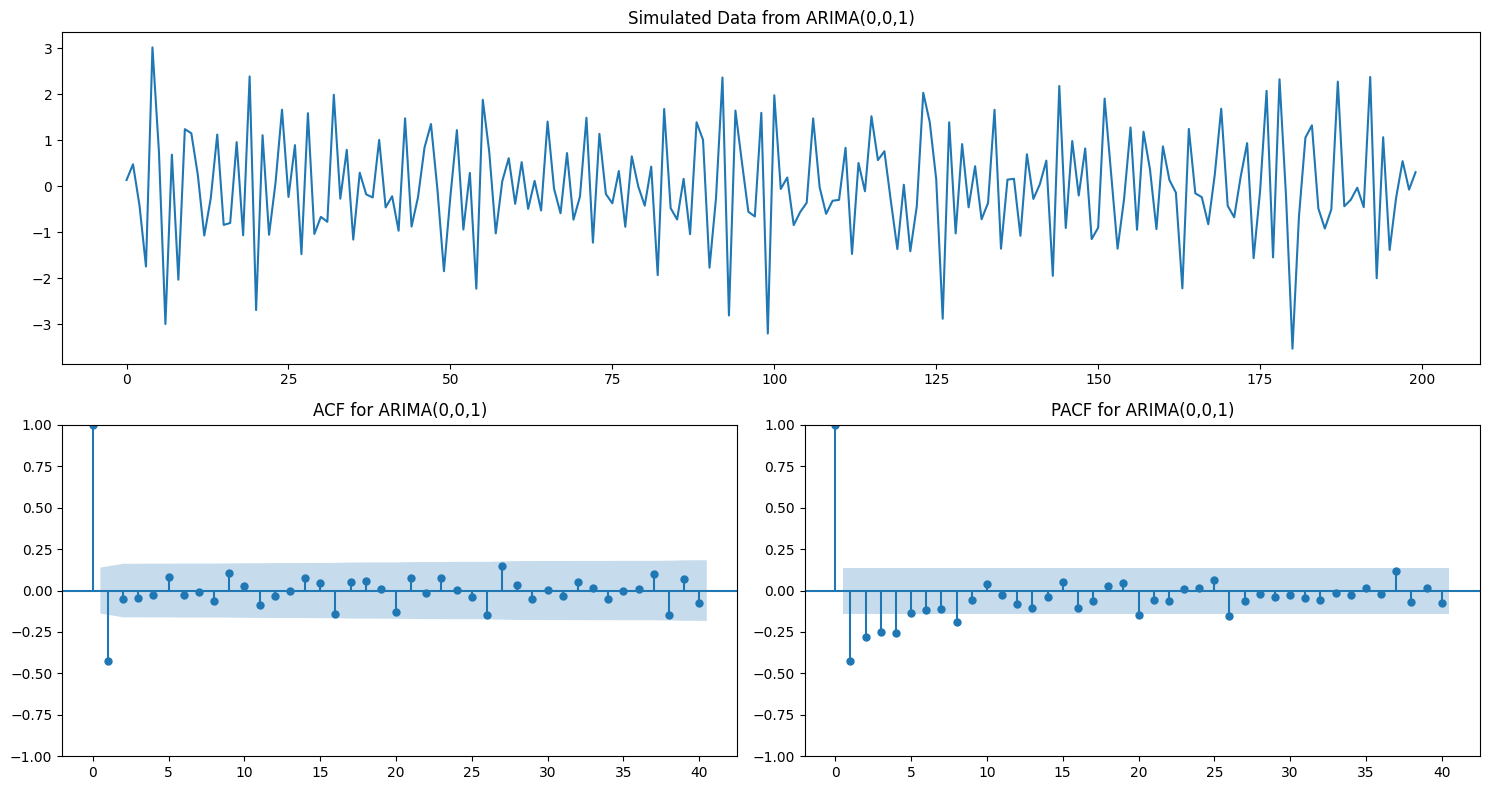

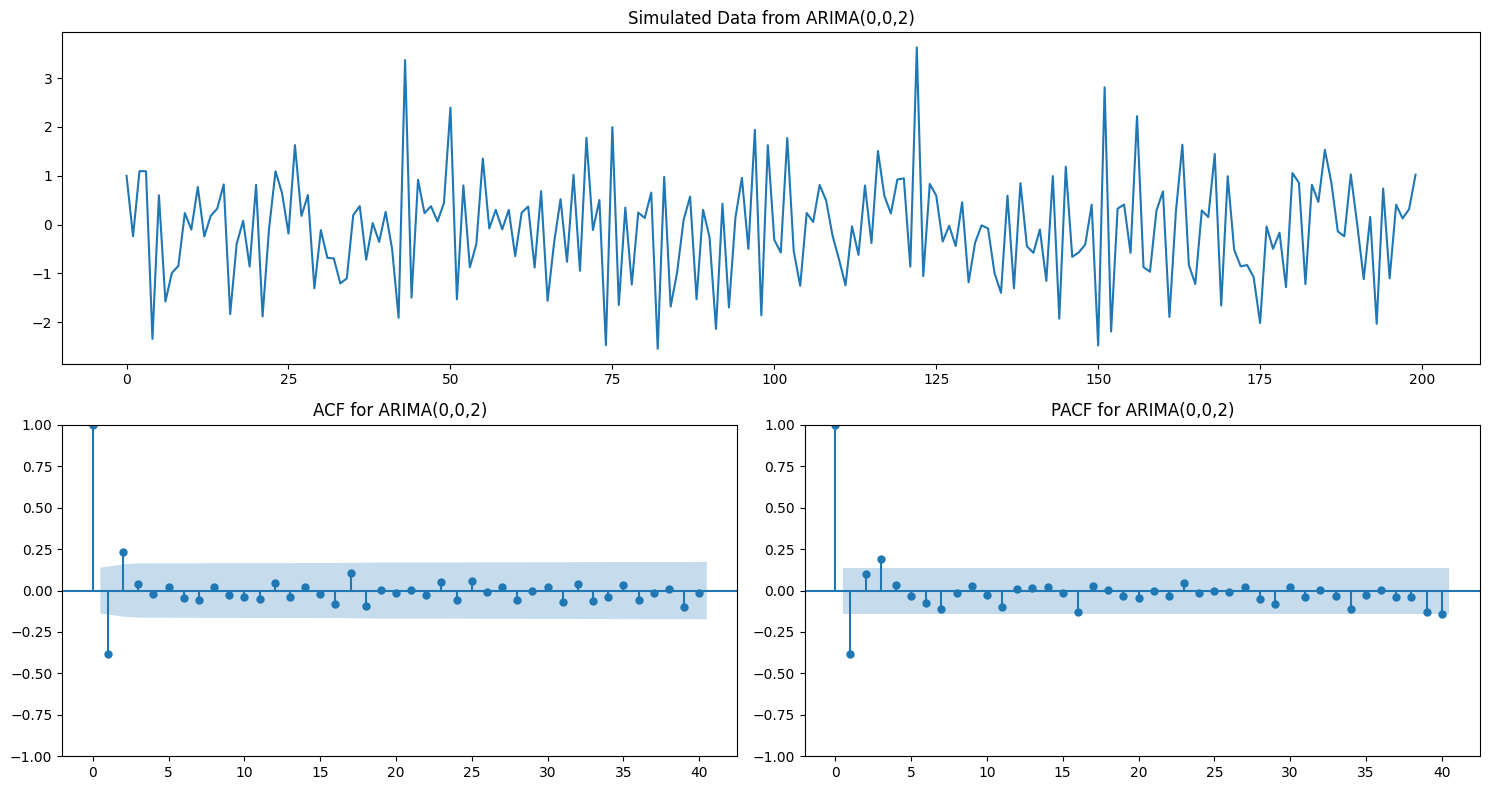

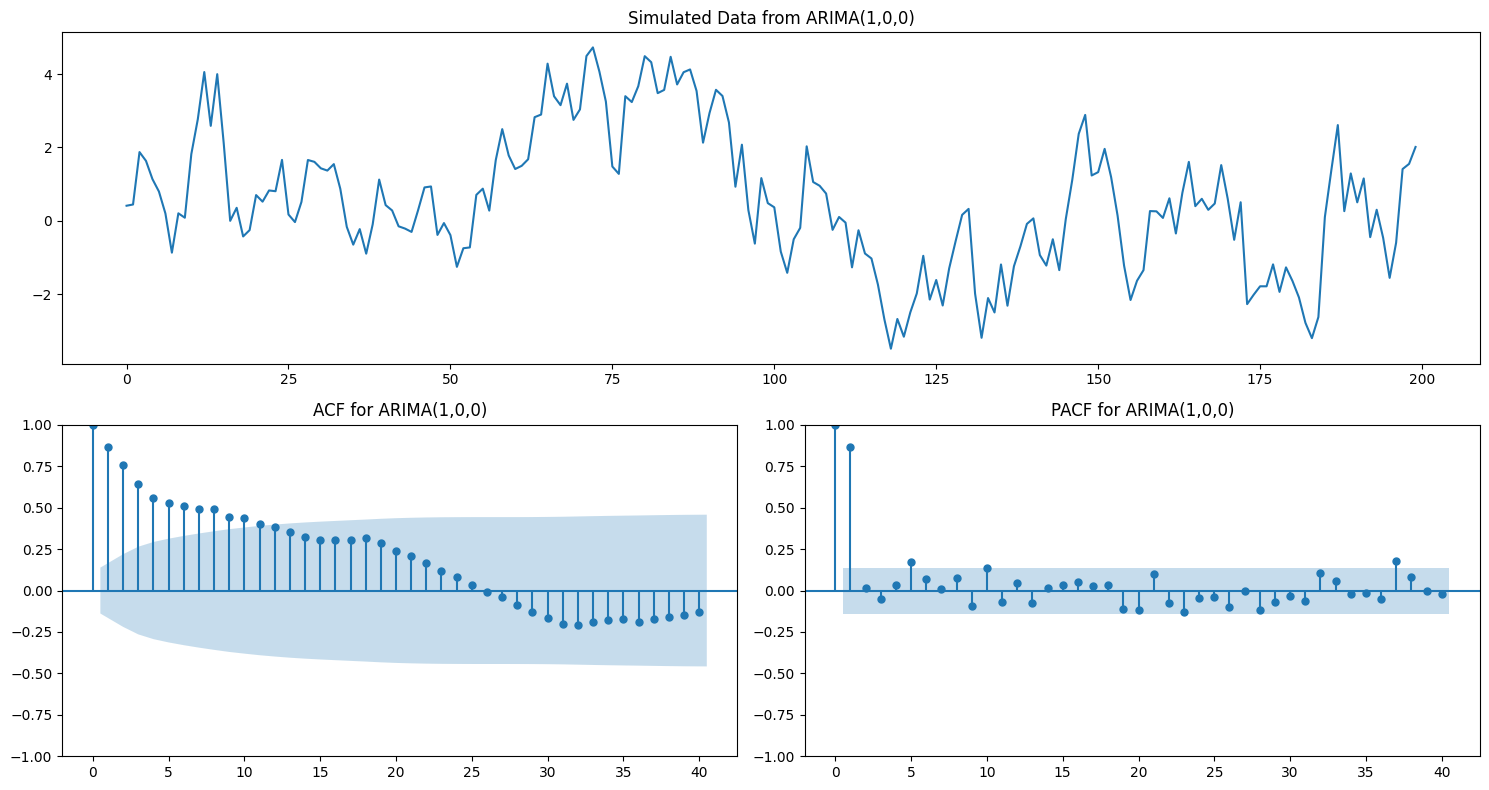

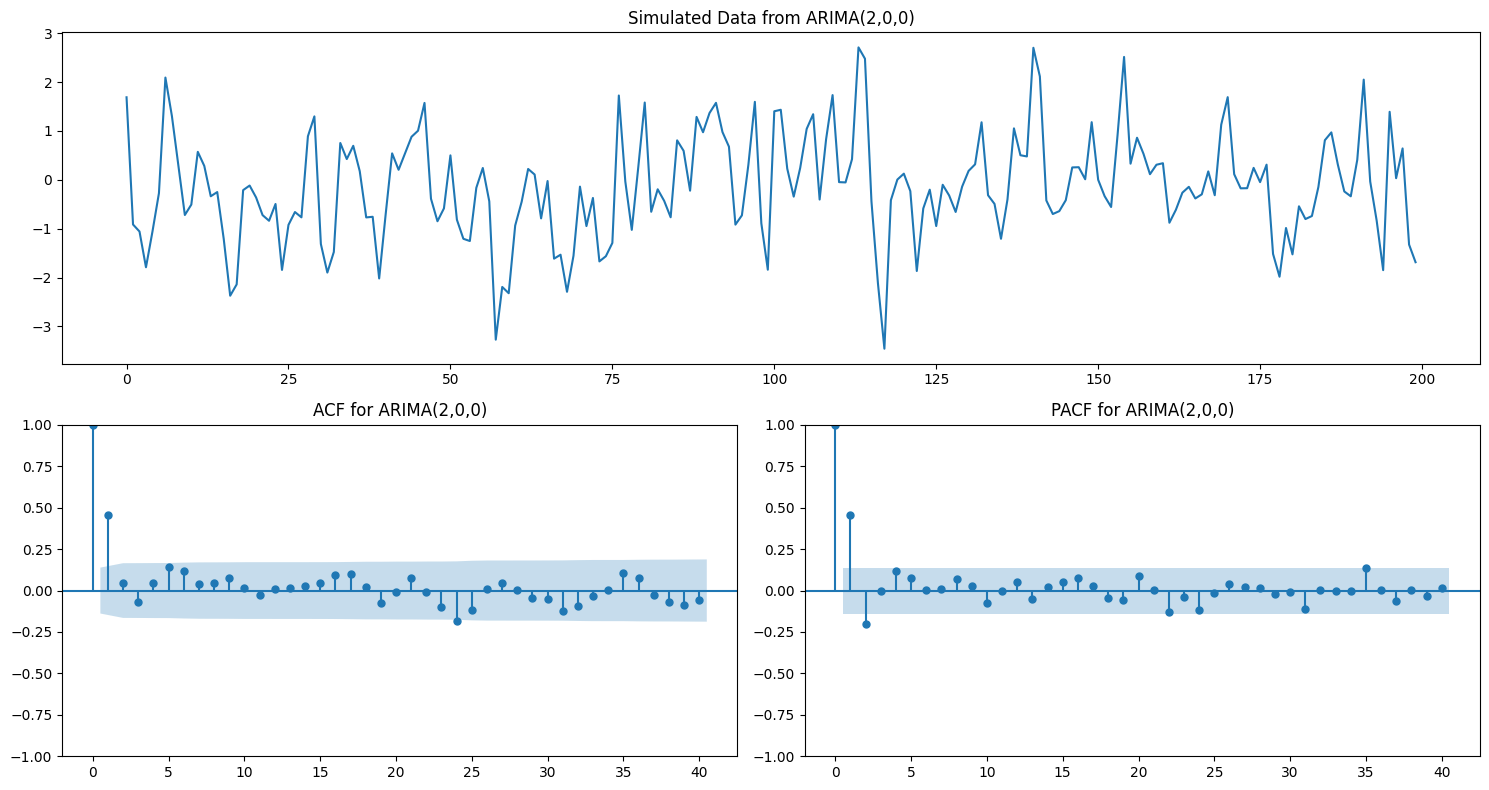

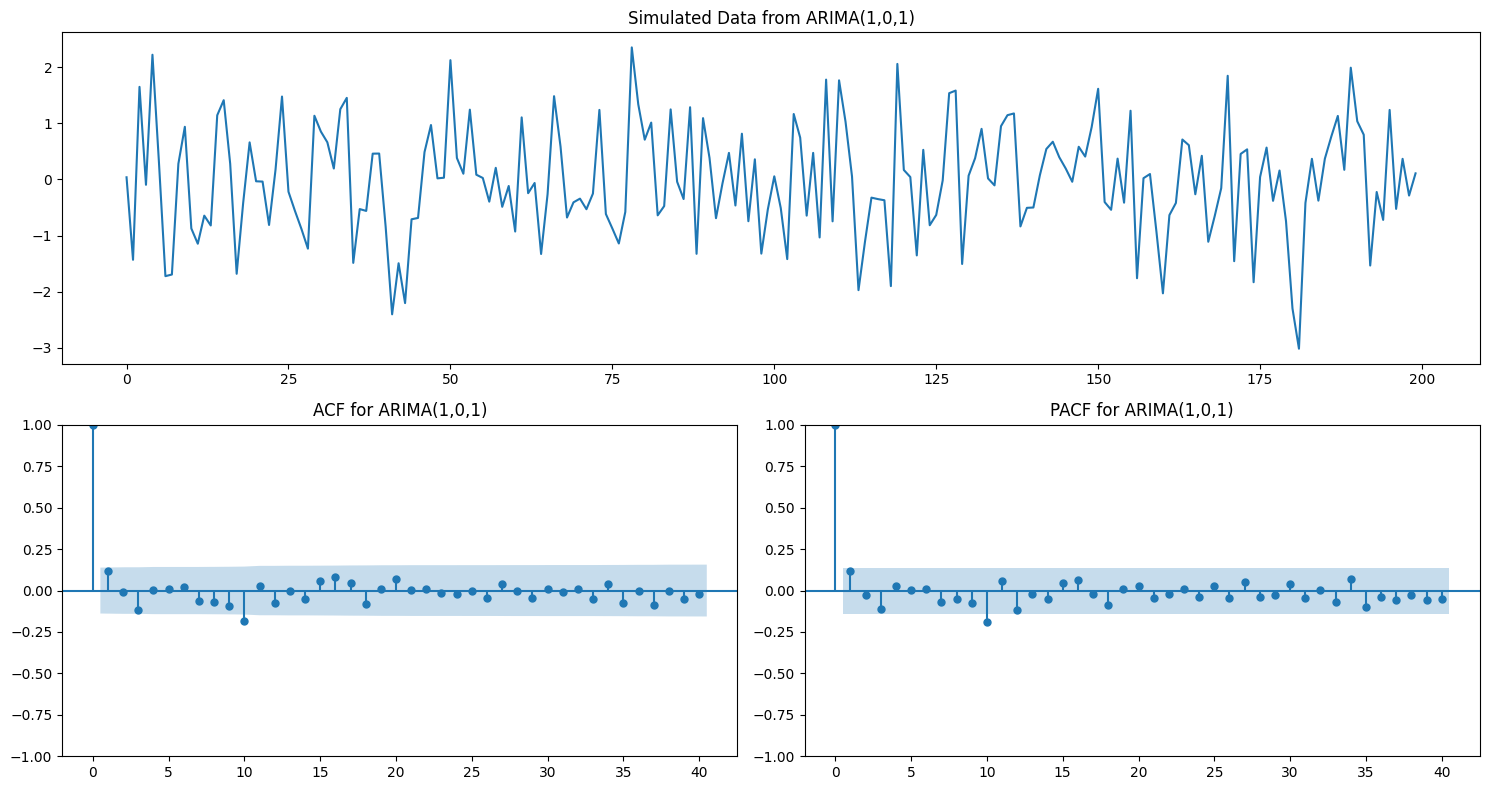

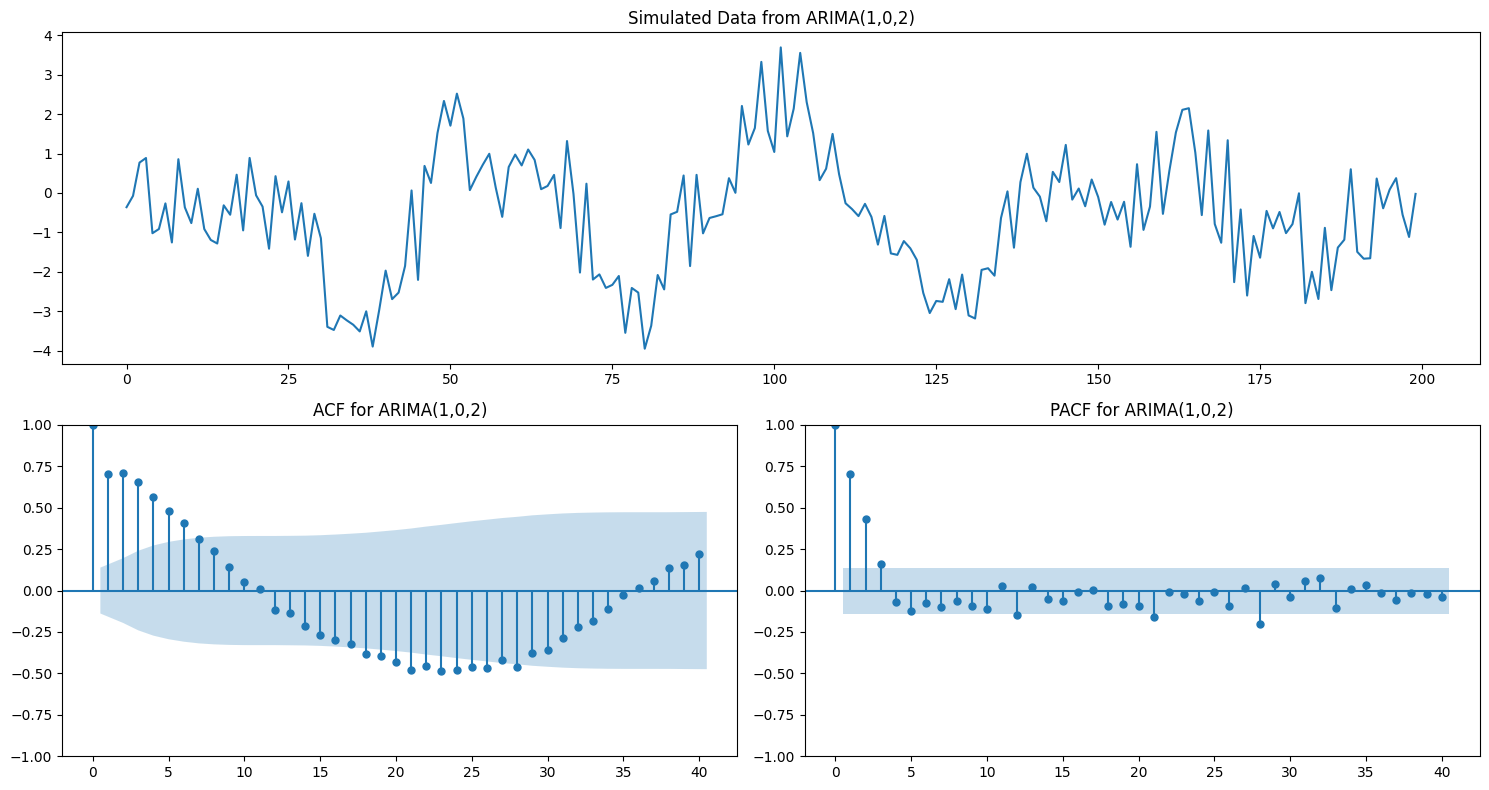

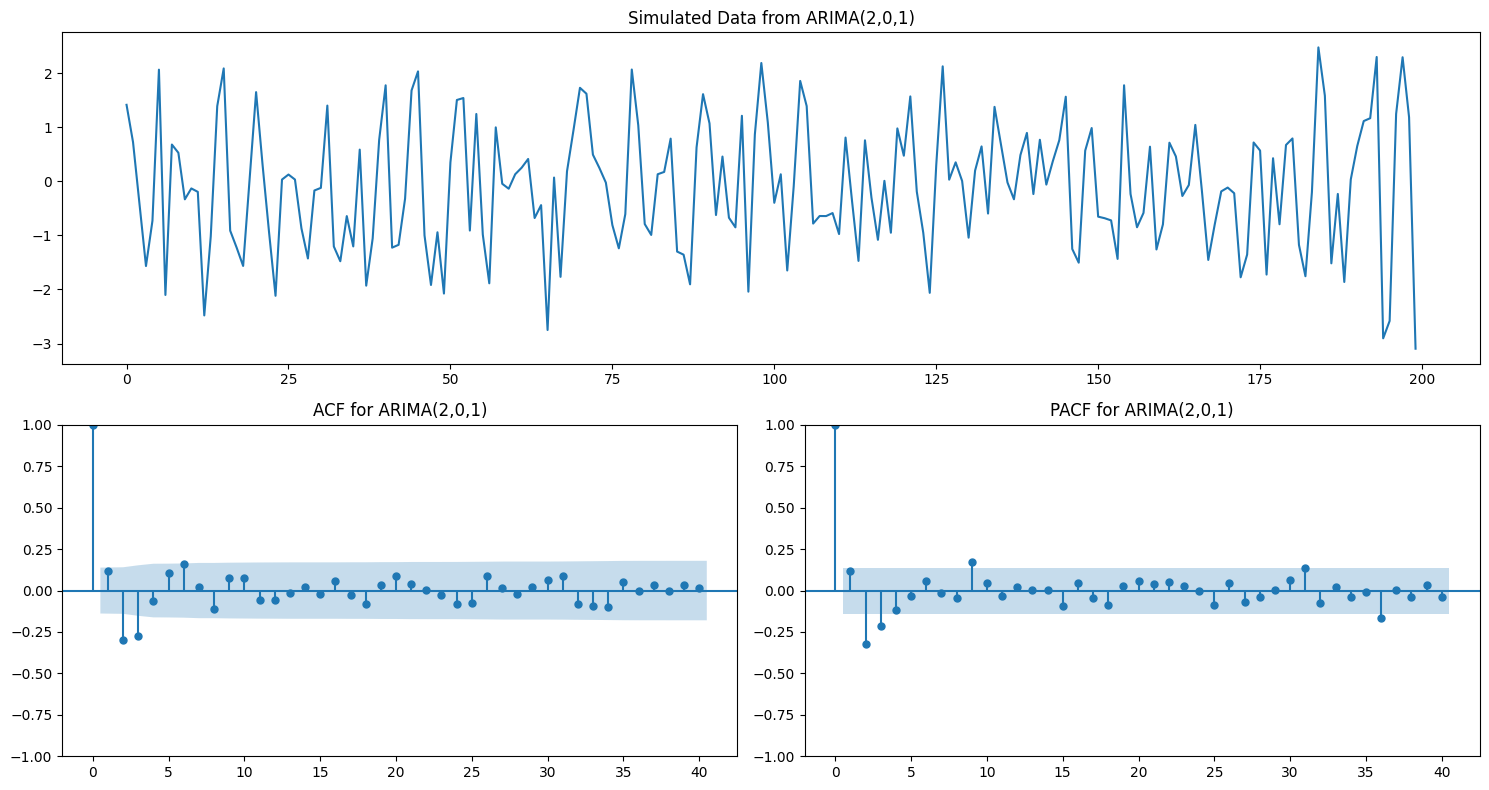

In [67]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

def plot_arima(ar, ma, title, nsample=200, lags=40):
    """
    Generate and plot data from an ARMA model along with its ACF and PACF.
    inputs:
    ar: Array of AR coefficients including the constant term.
    ma: Array of MA coefficients including the constant term.
    title: Title of the model for plots.
    nsample: Number of samples to generate.
    lags: Number of lags for ACF and PACF plots.
    """
    # Generate ARMA process
    arma_process = ArmaProcess(ar, ma)
    simulated_data = arma_process.generate_sample(nsample=nsample)

    # Generate subplots
    fig = plt.figure(figsize=(15, 8))

    # Plot Data
    ax1 = plt.subplot2grid((2, 2), (0, 0), colspan=2)
    ax1.plot(simulated_data)
    ax1.set_title(f'Simulated Data from {title}')

    # ACF plot
    ax2 = plt.subplot2grid((2, 2), (1, 0))
    plot_acf(simulated_data, ax=ax2, lags=lags)
    ax2.set_title(f'ACF for {title}')

    # PACF plot
    ax3 = plt.subplot2grid((2, 2), (1, 1))
    plot_pacf(simulated_data, ax=ax3, lags=lags)
    ax3.set_title(f'PACF for {title}')

    plt.tight_layout()
    plt.show()

# Define ARIMA models
models = {
    "ARIMA(0,0,1)": {"ar": np.array([1]), "ma": np.array([1, -0.9])},
    "ARIMA(0,0,2)": {"ar": np.array([1]), "ma": np.array([1, -0.5, 0.3])},
    "ARIMA(1,0,0)": {"ar": np.array([1, -0.9]), "ma": np.array([1])},
    "ARIMA(2,0,0)": {"ar": np.array([1, -0.5, 0.3]), "ma": np.array([1])},
    "ARIMA(1,0,1)": {"ar": np.array([1, -0.9]), "ma": np.array([1, -0.9])},
    "ARIMA(1,0,2)": {"ar": np.array([1, -0.9]), "ma": np.array([1, -0.5, 0.3])},
    "ARIMA(2,0,1)": {"ar": np.array([1, -0.5, 0.4]), "ma": np.array([1, -0.3])}
}

for index in range(len(models)):
    model_name, model_params = list(models.items())[index]
    plot_arima(model_params["ar"], model_params["ma"], model_name)
